# Redes Neuronales

En este notebook aprenderá a construir y a entrenar redes neuronales de una capa y multicapas, usando la librería [Keras](https://keras.io/).

Este notebook tiene una licencia de [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Un agradecimiento especial para [Valerio Maggio](https://mpba.fbk.eu).

## Instrucciones Generales

Keras es una librería de redes neuronales altamente modular, escrita en Python y capaz de ejecutarse sobre TensorFlow o Theano. Fue desarrollada con el objetivo de permitir una experimentación rápida con modelos de redes neuronales.

Este notebook esta compuesto por dos secciones. En la primera sección, usted beberá construir y entrenar una red neuronal de una capa para predecir el precio de una casa con el set de datos Boston Housing Data. En la segunda parte, se usará el mismo dataset pero usted beberá construir y entrenar una red neuronal multicapa para identificar sus ventajas. Para conocer más detalles de la base, puede ingresar al siguiente [vínculo](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/).
   
Para realizar la actividad, solo siga las indicaciones asociadas a cada celda del notebook. 

## Importar base de datos y librerías

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Reshaping the data (Combining odd and even rows correctly)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

# Extracting the target variable (MEDV)
target = raw_df.values[1::2, 2]

# Define column names for the features
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
    'TAX', 'PTRATIO', 'B', 'LSTAT'
]

# Create the DataFrame for features
boston = pd.DataFrame(data, columns=columns)

# Add the target variable (MEDV)
# df['MEDV'] = target

boston.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_316499/2583342347.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
# from sklearn.datasets import load_boston
# # Carga de datos de la librería sklearn
# boston_dataset = load_boston()
# boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
# boston.head()

## Definición de variables predictoras  y de interés

In [4]:
# Definición de variables predictoras (X)
X = boston.drop(boston.columns[-1],axis=1)
# Definición de variable de interés (y)
Y = pd.DataFrame(np.array(target), columns=['labels'])

In [5]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45


In [6]:
Y

,labels
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [7]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.3 ,random_state=22)

In [8]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [9]:
Y_train.shape

(354, 1)

In [10]:
# Definición de dimensiones de salida, varaibles de interés
output_var = Y_train.shape[1]
print(output_var, ' output variables')

1  output variables


In [11]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

12 input variables


# Red neuronal de una sola capa

In [12]:
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

2025-03-27 18:43:42.708114: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-27 18:43:42.708942: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-27 18:43:42.712757: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-27 18:43:42.723408: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743119022.742704  316499 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743119022.74

In [13]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

/home/edwin/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-27 18:43:44.635675: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

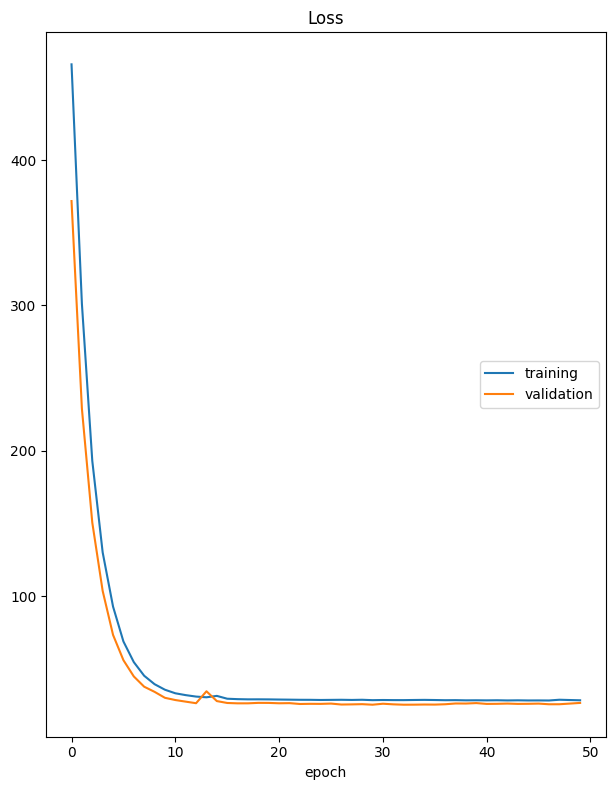

Loss
	training         	 (min:   28.118, max:  465.892, cur:   28.255)
	validation       	 (min:   25.213, max:  371.816, cur:   26.441)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 32.4818 - val_loss: 26.4414


In [15]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

## Red neuronal de una sola capa con early stopping

In [16]:
# Importación librerías
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [17]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

In [19]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

In [20]:
# Entrenamiento de la red neuronal con 50 épocas y early stopping
model.fit(X_train, Y_train, 
          verbose=True, 
          epochs=50, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop])

Epoch 1/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 579.6937

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 567.8481 - val_loss: 551.6982
Epoch 2/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 535.0839

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 507.4891 - val_loss: 486.3526
Epoch 3/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 433.2523

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 429.0107 - val_loss: 430.1178
Epoch 4/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 423.6228

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 396.4972 - val_loss: 381.9453
Epoch 5/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 356.6981

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 350.6064 - val_loss: 340.2718
Epoch 6/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 304.1686

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 310.8543 - val_loss: 303.6552
Epoch 7/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 261.6033

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 269.6896 - val_loss: 271.1015
Epoch 8/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 246.7259

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 244.4485 - val_loss: 242.5853
Epoch 9/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 241.1431

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 226.4341 - val_loss: 217.7916
Epoch 10/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 213.9104

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 206.5848 - val_loss: 195.6629
Epoch 11/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 194.3761

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 188.8934 - val_loss: 176.3347
Epoch 12/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 175.9796

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 166.5200 - val_loss: 159.1730
Epoch 13/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 159.5114

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 151.0074 - val_loss: 143.8868
Epoch 14/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 113.9125

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 132.4188 - val_loss: 130.3581
Epoch 15/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 146.9243

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 130.9506 - val_loss: 118.5285
Epoch 16/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 101.9304

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 107.1093 - val_loss: 107.9888
Epoch 17/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 117.5122

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 108.0867 - val_loss: 98.5372
Epoch 18/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 89.4410

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 93.9761 - val_loss: 90.3491
Epoch 19/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 93.4305

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 90.6489 - val_loss: 82.9962
Epoch 20/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 97.1916

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 87.6474 - val_loss: 76.4961
Epoch 21/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 60.4527

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 72.7043 - val_loss: 70.7539
Epoch 22/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 87.3147

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 75.6461 - val_loss: 65.7566
Epoch 23/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 67.9668

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 65.9351 - val_loss: 61.2749
Epoch 24/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 73.1507

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 64.4043 - val_loss: 57.3141
Epoch 25/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 78.2458

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 64.3973 - val_loss: 53.8765
Epoch 26/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 68.6046

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 59.0167 - val_loss: 50.7699
Epoch 27/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 39.4997

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 49.9070 - val_loss: 48.1131
Epoch 28/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 58.2391

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 53.7132 - val_loss: 45.7337
Epoch 29/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 42.6067

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 46.9492 - val_loss: 43.5580
Epoch 30/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 75.7525

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 55.1169 - val_loss: 41.6089
Epoch 31/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 47.1003

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 43.5342 - val_loss: 39.9006
Epoch 32/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 61.0652

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 47.1798 - val_loss: 38.3998
Epoch 33/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 21.6426

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 36.8450 - val_loss: 37.0600
Epoch 34/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 49.5109

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 41.8839 - val_loss: 35.8787
Epoch 35/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 35.6040

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 39.3804 - val_loss: 34.8780
Epoch 36/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 37.9827

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 36.5261 - val_loss: 34.0273
Epoch 37/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 28.1182

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 34.7989 - val_loss: 33.2346
Epoch 38/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 33.4948

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 35.5869 - val_loss: 32.4706
Epoch 39/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 32.2353

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 34.3155 - val_loss: 31.8307
Epoch 40/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 33.6206

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 35.4655 - val_loss: 31.2103
Epoch 41/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 23.1485

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 30.9983 - val_loss: 30.7222
Epoch 42/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 42.1215

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 34.4770 - val_loss: 30.2956
Epoch 43/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 30.3242

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 31.3103 - val_loss: 29.9076
Epoch 44/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 41.4555

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 35.6033 - val_loss: 29.5153
Epoch 45/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 49.7379

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 37.3081 - val_loss: 29.1288
Epoch 46/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 18.9038

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 29.3227 - val_loss: 28.8342
Epoch 47/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 23.8285

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 28.8064 - val_loss: 28.6258
Epoch 48/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 29.9631

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 30.0725 - val_loss: 28.4667
Epoch 49/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 21.9126

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 29.1793 - val_loss: 28.2238
Epoch 50/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 24.4817

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 27.3320 - val_loss: 28.1119


# Red Neuronal Multicapa

In [21]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,377 (271.00 KB)

 Trainable params: 69,377 (271.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
from keras.optimizers import Adam
model.compile(optimizer='sgd', loss='mean_squared_error')
#model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [23]:
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

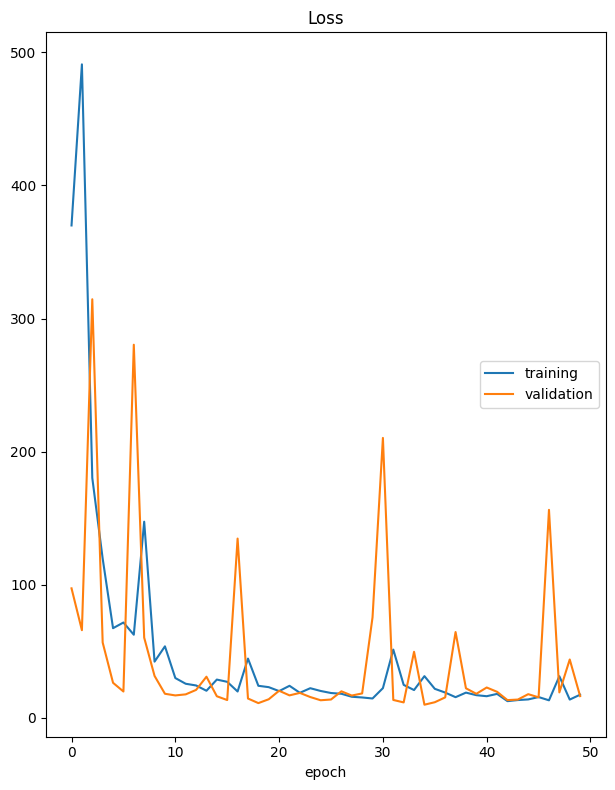

Loss
	training         	 (min:   12.570, max:  491.008, cur:   17.417)
	validation       	 (min:    9.899, max:  314.510, cur:   16.343)
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 24.3264 - val_loss: 16.3434


In [24]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=50, 
          callbacks=[PlotLossesKeras()])